In [6]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'd/swarajkedari/titanic-dataset-sk:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5160682%2F8621160%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240606%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240606T095601Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0d93f00547a8ce9e0cc378b633604629ed5859bb9352ca7fe5fab1336e4ad23bf7932b5bcc61dac18ce33a887a8b90e51b85ecc7b46a60729c80033950aa31a60a5dac64c567866b0327d4a28adb232c247f11996ba6302ba12953b81d8689192a67b0fb9222f9ead6bc3c3bc6bc63561f4d26ababf0ec4801f93e7cd9d2982c2982d20d2bc0dbbf244bc334c218a0c075a32e1c803622350c964e97884528b27840296912fce2e414a37bec7a81082b1b30a0ba69cb928d3d958e9943b687c242749ab20cae5815fcda5466988751b88477bee09f1080483fc4b2d9e14c98f4c7dcdd191ad45676a2880ec8e66de10a8e8ab682823c7bf0be6d29e2072b5da3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


OSError: [WinError 1314] A required privilege is not held by the client: '/kaggle/input' -> '..\\input'

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

In [15]:
df=pd.read_csv("/kaggle/input/d/swarajkedari/titanic-dataset-sk/Titanic-Dataset(sk).csv")
df.shape

NameError: name 'pd' is not defined

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.duplicated().sum()

0

In [8]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


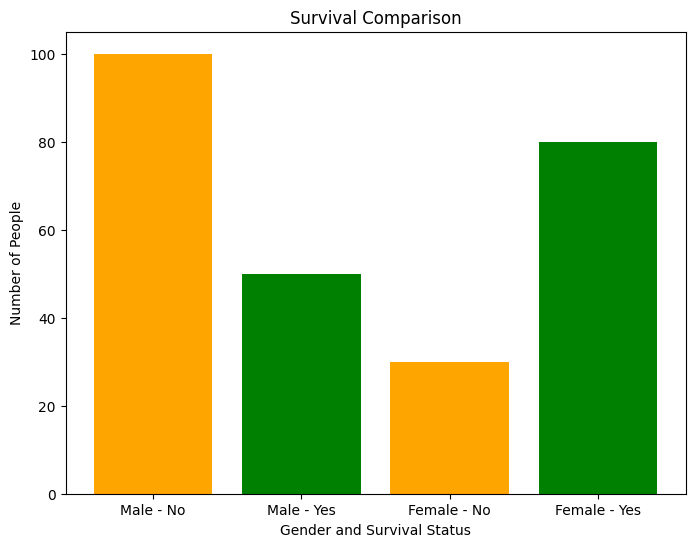

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [100, 50, 30, 80]}
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["orange","green","orange","green"])
plt.xticks(Survived['Survived'])
plt.title('Survival Comparison')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()

In [10]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [11]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']
sex=pd.get_dummies(inputs.Sex)
sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [12]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [13]:
inputs.drop(["Sex"],axis="columns",inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [14]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [15]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [16]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.7 KB


In [17]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

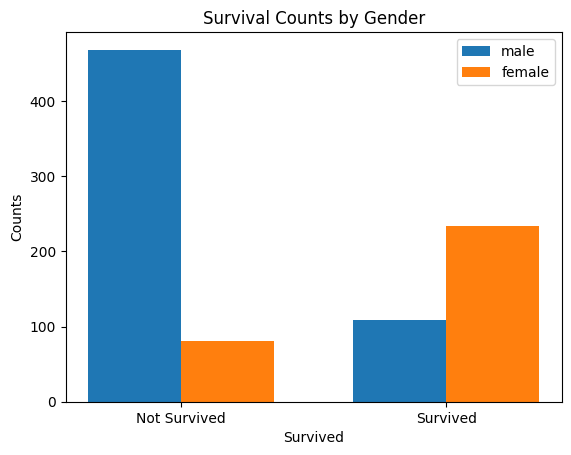

In [18]:
counts = df.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

bar_width = 0.35
index = counts.index

fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')
ax.set_xlabel('Survived')
ax.set_ylabel('Counts')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)
X_train

,Pclass,Age,Fare,female,male
180,3,29.699118,69.5500,True,False
101,3,29.699118,7.8958,False,True
112,3,22.000000,8.0500,False,True
504,1,16.000000,86.5000,True,False
681,1,27.000000,76.7292,False,True
...,...,...,...,...,...
520,1,30.000000,93.5000,True,False
743,3,24.000000,16.1000,False,True
234,2,24.000000,10.5000,False,True
346,2,40.000000,13.0000,True,False


In [20]:
X_test

,Pclass,Age,Fare,female,male
841,2,16.000000,10.5000,False,True
324,3,29.699118,69.5500,False,True
709,3,29.699118,15.2458,False,True
847,3,35.000000,7.8958,False,True
678,3,43.000000,46.9000,True,False
...,...,...,...,...,...
826,3,29.699118,56.4958,False,True
217,2,42.000000,27.0000,False,True
175,3,18.000000,7.8542,False,True
353,3,25.000000,17.8000,False,True


In [21]:
y_train

180    0
101    0
112    0
504    1
681    1
      ..
520    1
743    0
234    0
346    1
660    1
Name: Survived, Length: 712, dtype: int64

In [22]:
y_test

841    0
324    0
709    1
847    0
678    0
      ..
826    0
217    0
175    0
353    0
845    0
Name: Survived, Length: 179, dtype: int64

In [23]:

inputs.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


<Axes: >

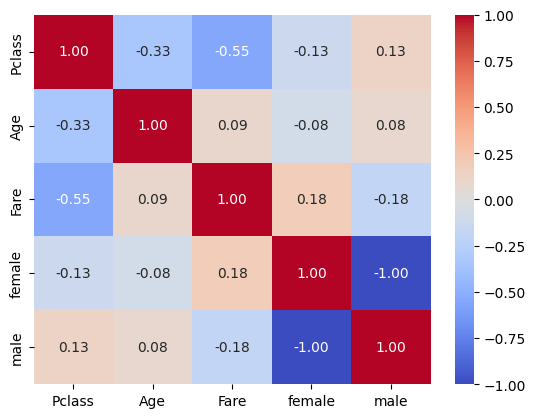

In [24]:
import seaborn as sns
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
model.score(X_test,y_test)

0.8324022346368715

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score # Import the r2_score function

model = RandomForestClassifier()
model.fit(X_train, y_train)

predict = model.predict(X_test)
matrices = r2_score(predict, y_test)
matrices

0.30369547096415694